# Play With Math 
__(Math Review and Visualisation)__

In [1]:
import numpy as np
from scipy import signal

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
plt.style.use('ggplot')
%matplotlib inline

### Fourier Series, Descrete Fourier Transform

(Descrete) __Fourier Series__, using: 

$C_n =  \frac{1}{N} \sum_{t=0}^{T} x(t)*e^{- 2 \pi i nt /T}$

where $N$: number of samples, $T$: period.

We have $t$, i.e. $t(k) = \frac{T}{N}*k$, $k$: [$0$, $N-1$], and there is another way to write the equation (__Discrete Fourier Transform__):

$C_n =  \frac{1}{N} \sum_{k=0}^{N-1} x(t)*e^{- 2 \pi i nk /N}$

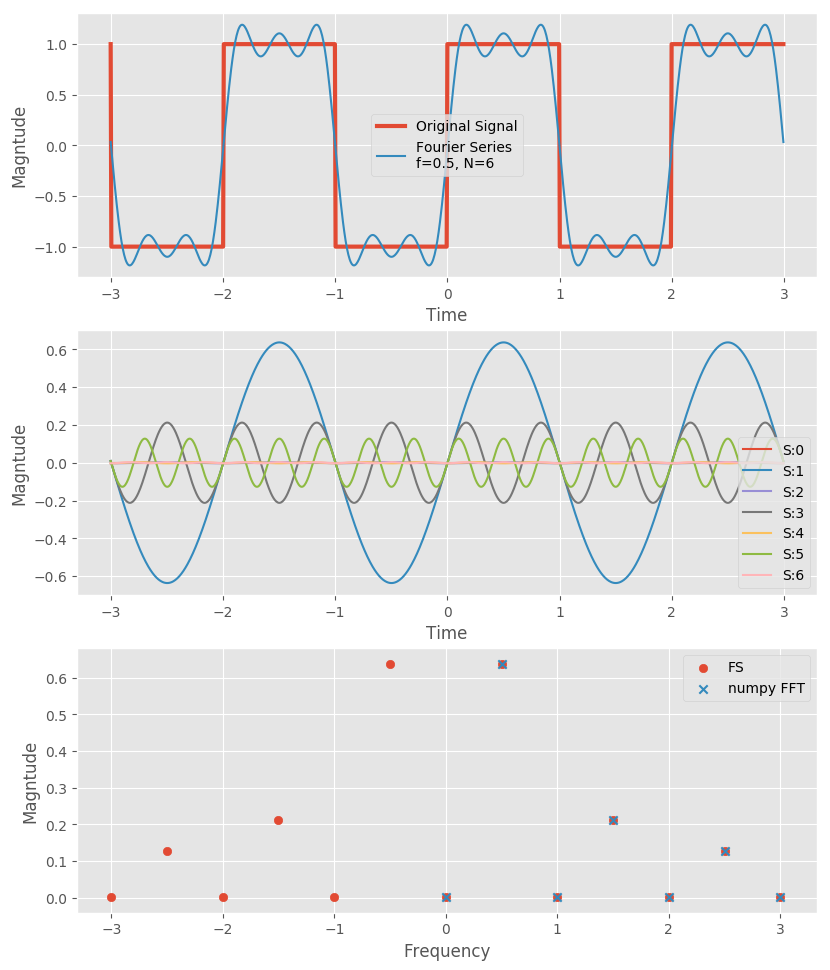

In [2]:
def do_fs(t, x, n_cycles=1, n_harmonic=6):
    f_sig = n_cycles / (t[-1] - t[0])
    n_samples = len(t)
    thr = max(1. / n_samples, 0.0001)

    range_harmo = np.arange(-n_harmonic, n_harmonic + 1)
    # calculate c_n, using 1 period.
    # alternative: using n period.
    n_per_period = int(n_samples / n_cycles)
    c_n = np.inner(x[0:n_per_period],
                   np.exp(t[0: n_per_period] * -1j * 2 * np.pi * f_sig *
                          range_harmo[:, None])) / n_per_period
    c_mag = abs(c_n)

    ys = c_n[:, None] * np.exp(1j * t * 2 * np.pi * f_sig *
                               range_harmo[:, None])
    y = ys.sum(axis=0)

    _, ax = plt.subplots(3, 1, figsize=(8, 10))
    ax[0].plot(t, x, label='Original Signal', linewidth=3)
    ax[0].plot(t, y.real, label='Fourier Series\nf=%.1f, N=%d' %
               (f_sig, n_harmonic))
    ax[0].legend()
    ax[0].set_xlabel('Time')
    ax[0].set_ylabel('Magntude')

    for i in range(len(ys) >> 1, len(ys)):
        if c_mag[i] > thr:
            # presum x is a real function
            ax[1].plot(t, ys[i].real, label='S:%d' % range_harmo[i])
            ax[1].legend()
            ax[1].set_xlabel('Time')
            ax[1].set_ylabel('Magntude')

    ax[2].scatter(range_harmo * f_sig, c_mag, label='FS')
    npf = np.fft.fft(x)
    ax[2].scatter(np.arange(0, n_harmonic + 1) * f_sig,
                  abs(npf[0:(n_harmonic + 1) * n_cycles:n_cycles]) / n_samples,
                  marker='x', label='numpy FFT')
    ax[2].legend()
    ax[2].set_xlabel('Frequency')
    ax[2].set_ylabel('Magntude')


t = np.linspace(-3, 3, 1000, endpoint=False)
n_cycles = 3
f_sig = n_cycles / (t[-1] - t[0])
x = signal.square(t * 2 * np.pi * f_sig)

do_fs(t, x, n_cycles=3)

    